In [173]:
import pennylane as qml

import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
import datetime
from statsmodels.tsa.stattools import adfuller
%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 16, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [174]:
time = np.arange(0, 100, 0.1)
sin = np.sin(time) + np.random.normal(scale=0.5, size=len(time))
cos = np.cos(time) + np.random.normal(scale=0.5, size=len(time))
super4=0.5*(np.sin(time)+np.cos(time))+ np.random.normal(scale=0.5, size=len(time))

[*********************100%***********************]  1 of 1 completed


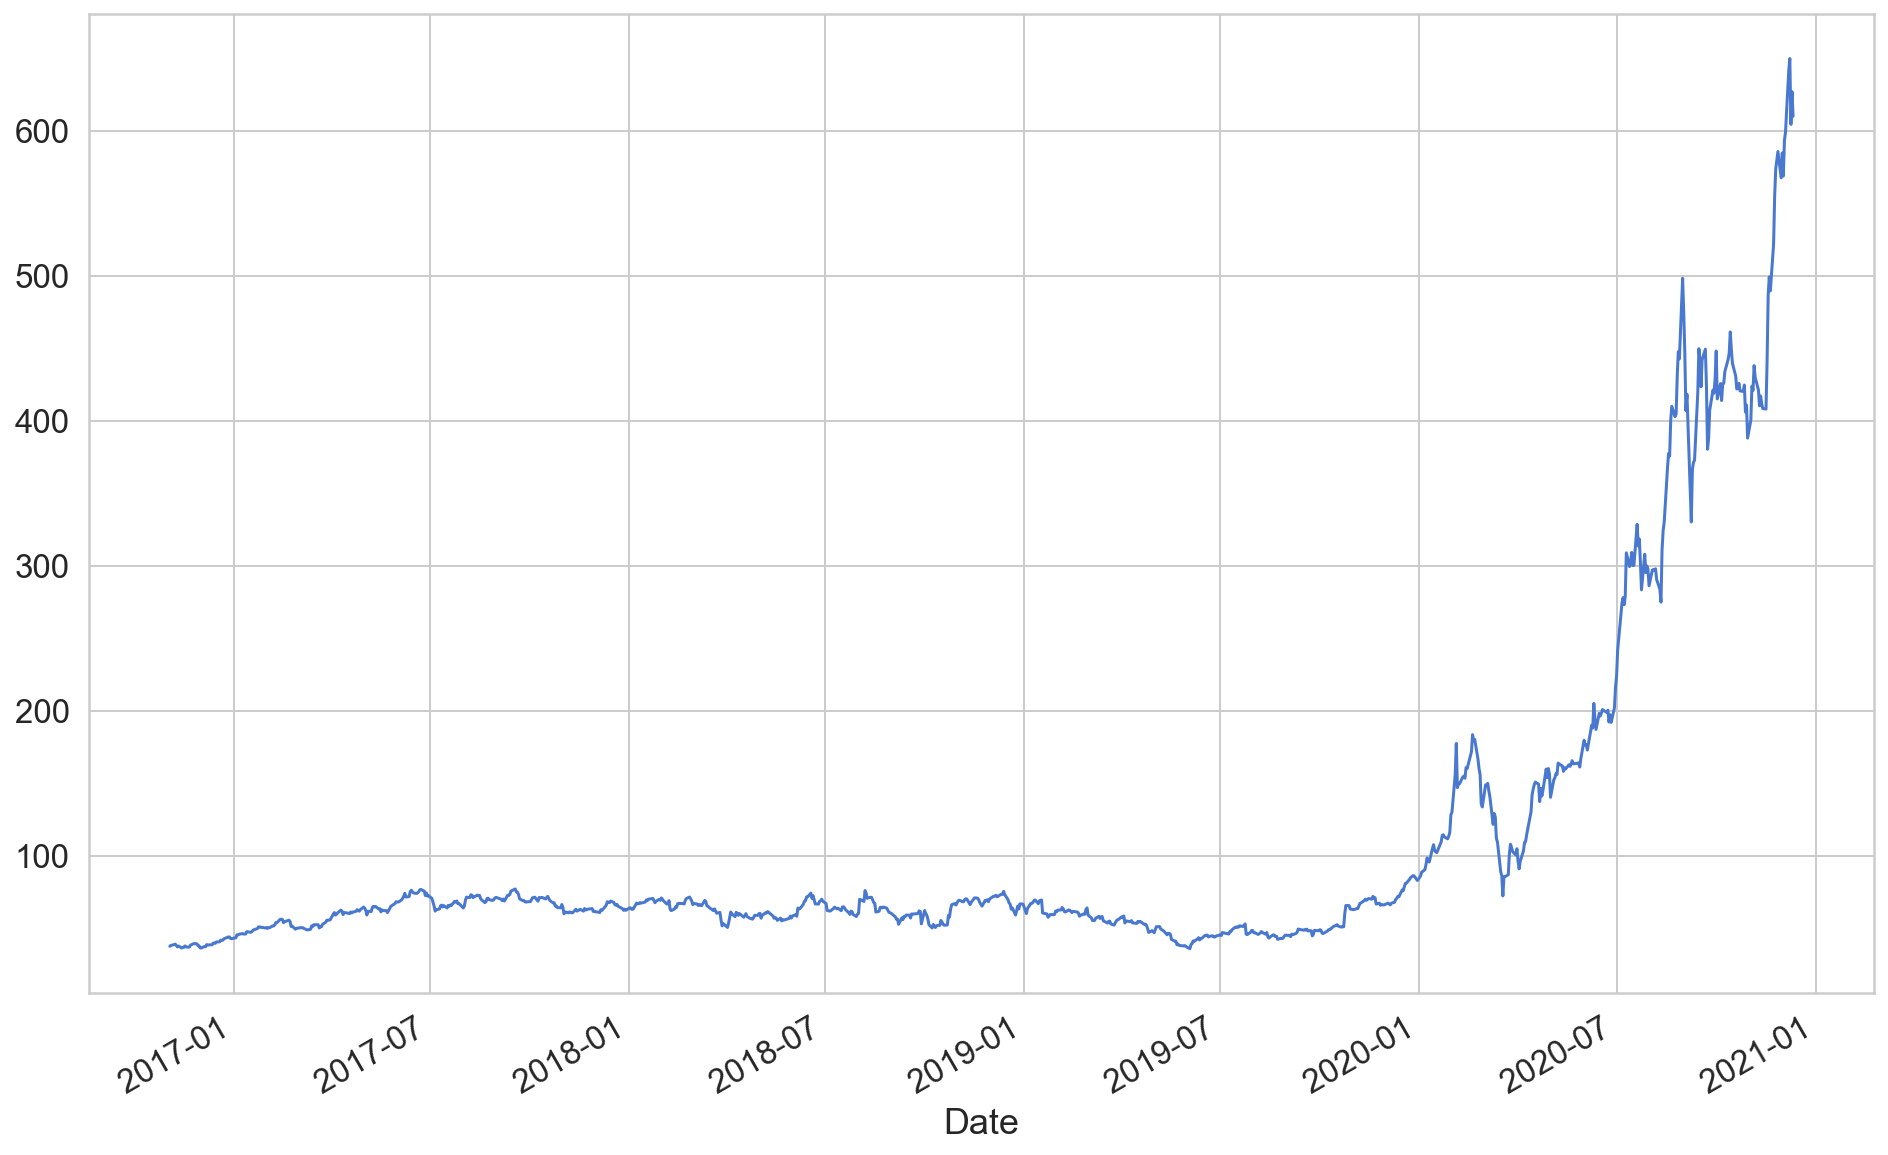

Date
2016-11-03    0.062473
2016-11-04    0.063520
2016-11-07    0.064403
2016-11-08    0.064980
2016-11-09    0.063353
                ...   
2020-12-07    1.069600
2020-12-08    1.083133
2020-12-09    1.007467
2020-12-10    1.045117
2020-12-11    1.016650
Name: Close, Length: 1034, dtype: float64


In [175]:
import yfinance as yf   
import matplotlib.pyplot as plt  
# Get the data for the stock Apple by specifying the stock ticker, start date, and end date 
data = yf.download('TSLA','2016-11-3','2020-12-14') 


# Create DataFrame from non-compatible dictionary

# Plot the close prices 
data.Close.plot() 
plt.show()
closing=data['Close']/600
print(closing)

In [176]:
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override()

# download dataframe
data = pdr.get_data_yahoo("TSLA",'2016-11-3','2020-11-27')
closing=data['Close']
#print(closing)
closing2=np.zeros(1000)

## naive normalization of data 
for i in range(1000):
    closing2[i]=data['Close'][i]

print(closing2)


time2 = np.arange(0, 1000, 1)
df4=pd.DataFrame((dict(closing2=closing2)),index=time2,columns=['closing2'])
print(df4)


df = pd.DataFrame(dict(sine=sin), index=time, columns=['sine'])
df2 = pd.DataFrame(dict(cosine=cos), index=time, columns=['cosine'])
df3=pd.DataFrame(dict(super4=super4),index=time, columns=['super4'])

result2=adfuller(df4)
result = adfuller(df)
# aguemented dicky fuller test
train_size = int(len(df) * 0.8)
test_size = len(df2) - train_size

train_size2 = int(len(df2) * 0.8)
test_size2 = len(df2) - train_size2

train_size3 = int(len(df3) * 0.8)
test_size3 = len(df3) - train_size3


train_size4 = int(len(df4) * 0.8)
test_size4 = len(df4) - train_size4

train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
train2, test2 = df2.iloc[0:train_size2], df2.iloc[train_size2:len(df2)]
train3, test3 = df3.iloc[0:train_size2], df3.iloc[train_size2:len(df3)]

train4, test4 = df4.iloc[0:train_size4], df4.iloc[train_size4:len(df4)]
#print(len(train), len(test))
#print(len(train2), len(test2))
print('ADF Statistic: %f' % result2[0])
print('p-value: %f' % result2[1])
for key, value in result2[4].items():
    print('\t%s: %.3f' % (key, value))
## The expectation values and standard deviations associated with the PDF of the time series has no time dependce via the unit root
##test of the dickey fuller method


[*********************100%***********************]  1 of 1 completed
[0.12494667 0.12704    0.12880666 0.12996    0.12670667 0.12356667
 0.12570667 0.12096667 0.12251334 0.12262    0.12577333 0.12334667
 0.12301333 0.12744667 0.12875999 0.13110001 0.13074666 0.12638
 0.12626667 0.12125333 0.12098    0.12453334 0.12389999 0.12876667
 0.12819333 0.12812    0.12828667 0.1321     0.13246    0.13172
 0.13499334 0.13515334 0.13919333 0.13846667 0.13896666 0.14222666
 0.14635333 0.14649334 0.14312    0.14246    0.14466    0.15132666
 0.15116666 0.15267333 0.15418667 0.15324666 0.15315333 0.15306
 0.1585     0.15705334 0.15890667 0.16250666 0.16315333 0.16594667
 0.16974    0.16964667 0.16834    0.16863333 0.16708666 0.16795334
 0.16616    0.1677     0.16755333 0.17184667 0.17165333 0.17472
 0.17946667 0.17948667 0.18706666 0.18732    0.18650667 0.1793
 0.18148666 0.18492667 0.18234    0.17066001 0.17133334 0.16415333
 0.16666    0.16668001 0.16698667 0.16771333 0.16747334 0.16572666
 0.16458 

Coefficients: intercept      0.002226
closing2.L1    0.982067
closing2.L2    0.040878
closing2.L3   -0.032978
dtype: float64
Test RMSE: 0.746


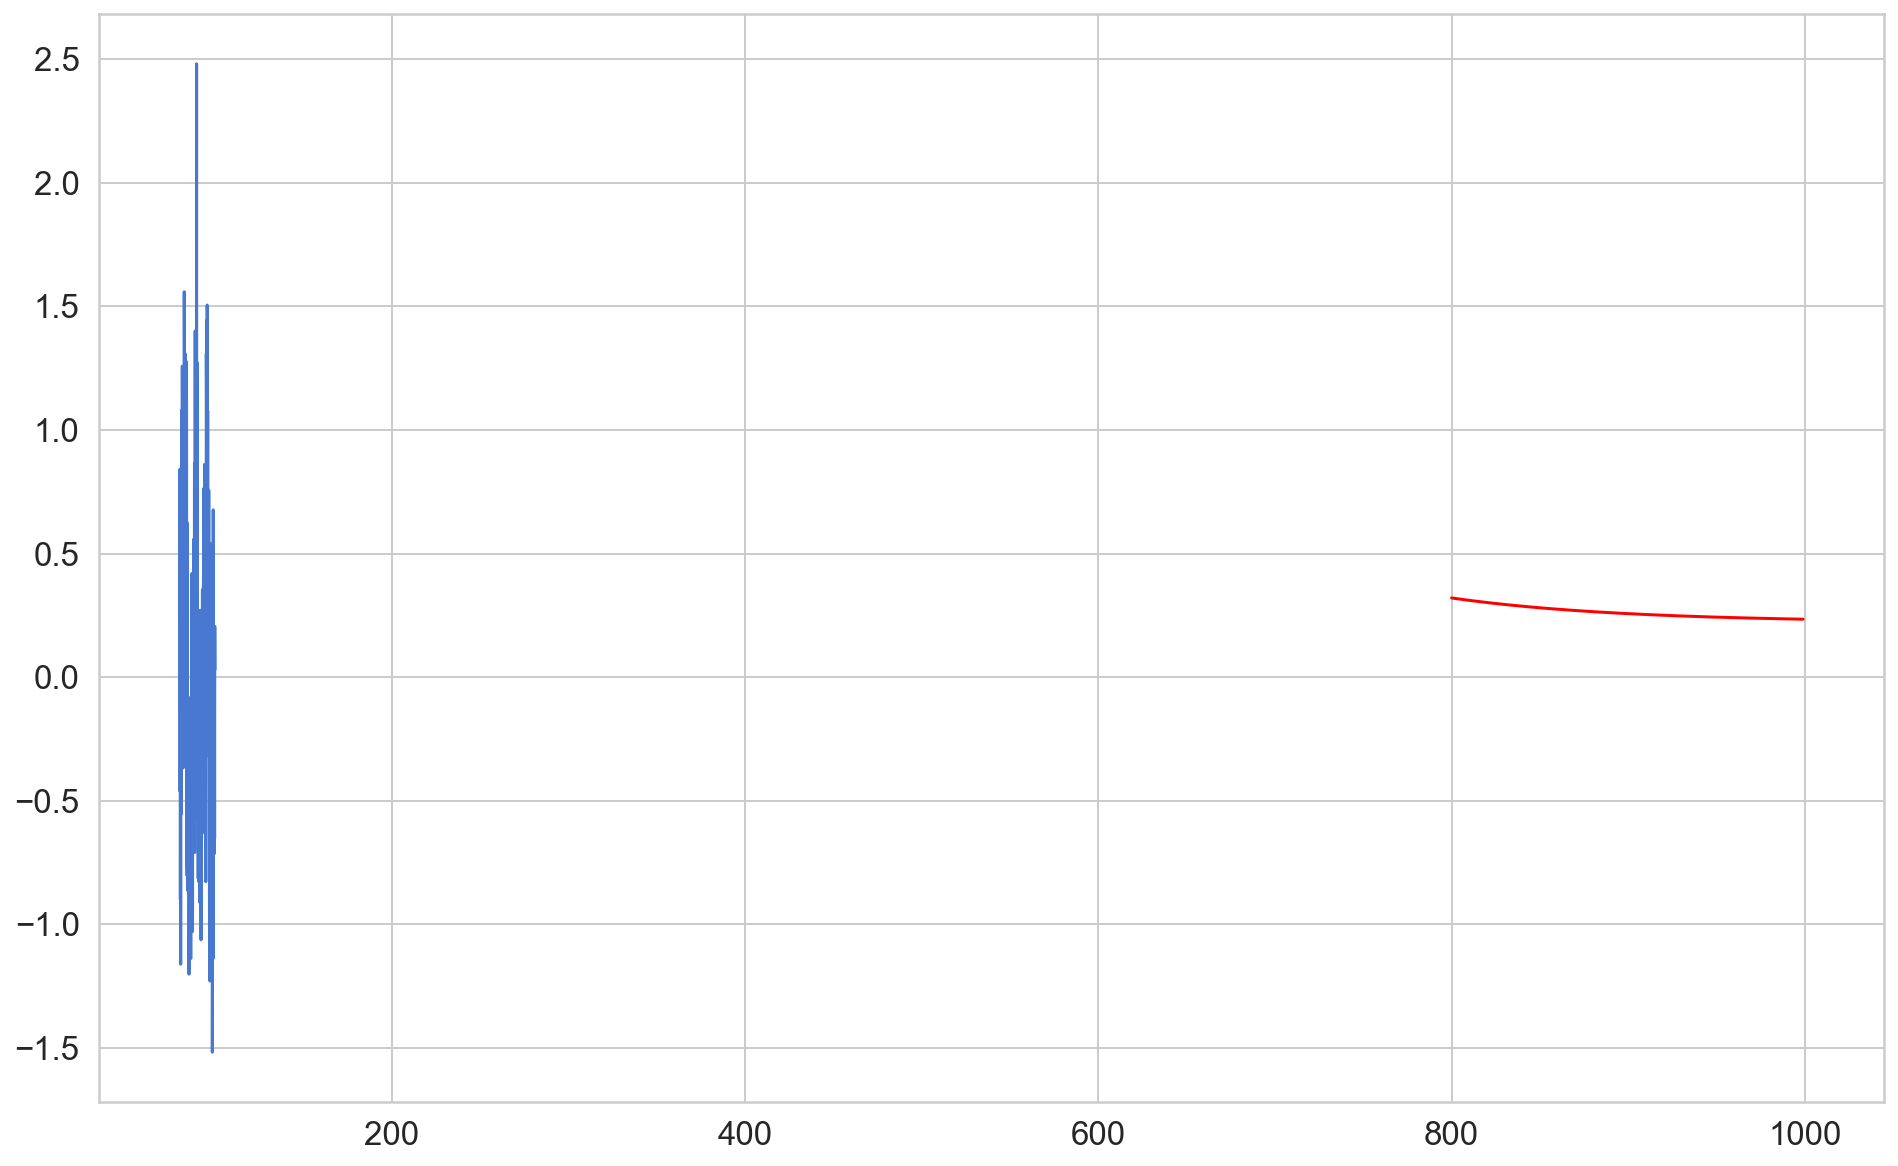

In [177]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

# train autoregression
model = AutoReg(train4, lags=3)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train3), end=len(train3)+len(test3)-1, dynamic=False)
rmse = sqrt(mean_squared_error(test3, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
pyplot.plot(test3)
pyplot.plot(predictions, color='red')
pyplot.show()

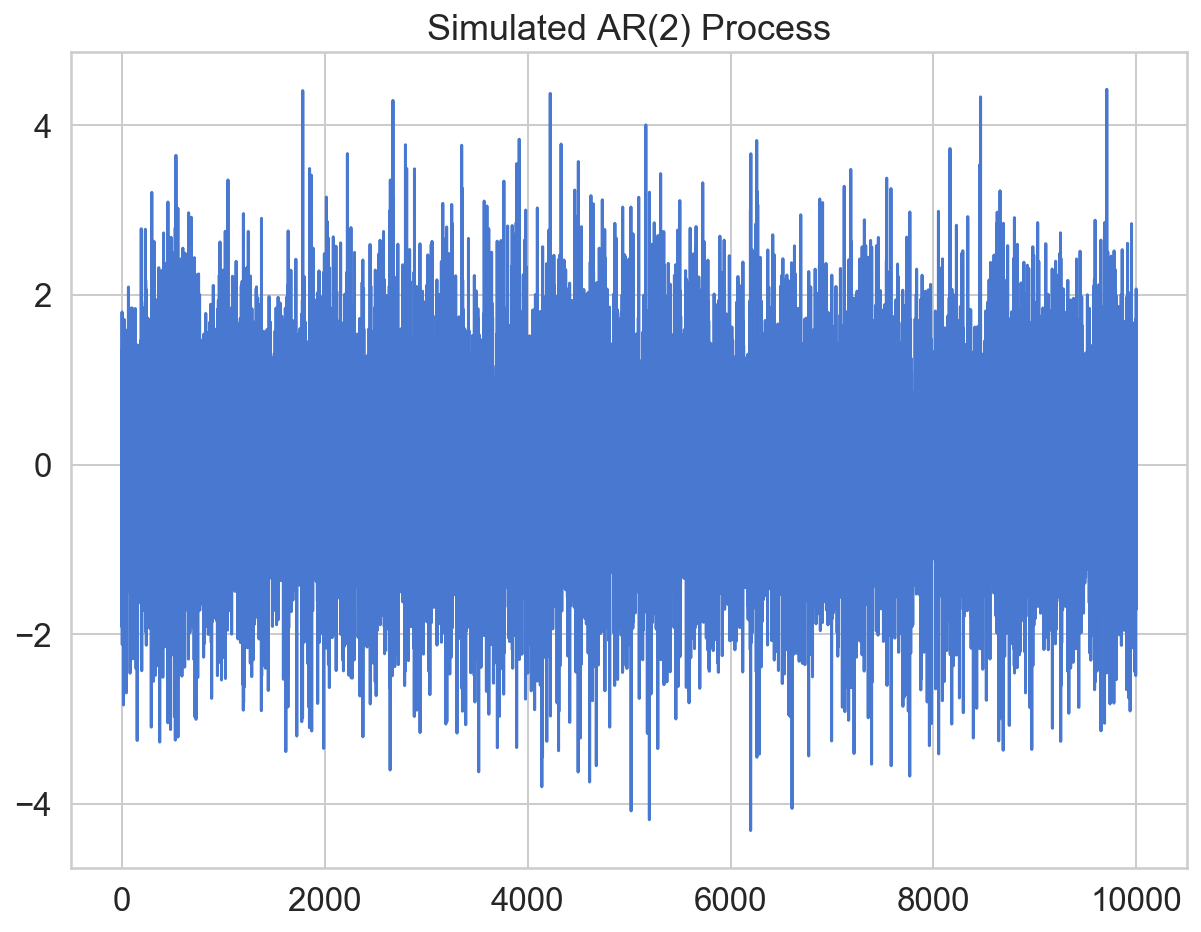

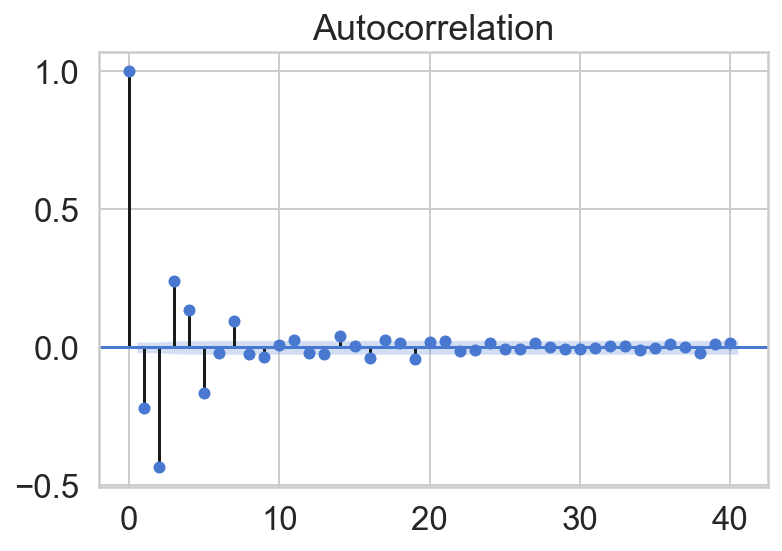

In [178]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import pacf
from statsmodels.regression.linear_model import yule_walker
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

ar2 = np.array([1, 0.33, 0.5])
ma = np.array([1])
simulated_AR2_data = ArmaProcess(ar2, ma).generate_sample(nsample=10000)
plt.figure(figsize=[10, 7.5]); # Set dimensions for figure
plt.plot(simulated_AR2_data)
plt.title("Simulated AR(2) Process")
plt.show()


plot_acf(simulated_AR2_data);




In [179]:
pacf_coef_AR2 = pacf(simulated_AR2_data)
print(pacf_coef_AR2)

rho, sigma = yule_walker(simulated_AR2_data, 2, method='mle')
print(f'rho: {-rho}')
print(f'sigma: {sigma}')

[ 1.00000000e+00 -2.20757162e-01 -5.06594641e-01 -1.90795444e-02
 -1.07290775e-02 -9.77041685e-03 -1.09001430e-02  1.37938509e-03
 -6.02801961e-03  5.43132254e-03 -2.04382041e-02  1.09306465e-02
 -1.30237023e-02 -2.16325832e-02  1.69581823e-02  1.43043369e-03
 -1.07054896e-02  1.62429809e-02  2.79299955e-04 -1.99032830e-02
  1.15838455e-02 -1.11069990e-03  1.53583686e-02  1.44582747e-03
  9.56140499e-03 -4.79457661e-03  9.75268731e-04  1.31528080e-02
  9.79787086e-03  1.42134927e-02 -1.74639690e-03 -7.97463995e-03
 -2.64819787e-03  6.06888429e-03 -8.78543223e-04 -3.86333065e-03
  4.15867368e-03  7.45329433e-03 -1.37087997e-02  5.47591574e-03
  6.29241477e-03]
rho: [0.33253479 0.50648813]
sigma: 1.0030059278558072


In [180]:
time_steps = 10
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [181]:

# reshape to [samples, time_steps, n_features]




X_train, y_train = create_dataset(train, train.sine, time_steps)
X_test, y_test = create_dataset(test, test.sine, time_steps)

X_train2, y_train2 = create_dataset(train2, train2.cosine, time_steps)
X_test2, y_test2 = create_dataset(test2, test2.cosine, time_steps)


X_train3, y_train3 = create_dataset(train3, train3.super4, time_steps)
X_test3, y_test3 = create_dataset(test3, test3.super4, time_steps)


X_train4, y_train4 = create_dataset(train4, train4.closing2, time_steps)
X_test4, y_test4 = create_dataset(test4, test4.closing2, time_steps)



print(X_train.shape, y_train.shape)
print(X_test2.shape, y_train2.shape)
print(X_test3.shape, y_train3.shape)
print(X_test4.shape, y_train4.shape)

(790, 10, 1) (790,)
(190, 10, 1) (790,)
(190, 10, 1) (790,)
(190, 10, 1) (790,)


In [182]:

from pennylane.qnn import KerasLayer
from tensorflow.keras.callbacks import TensorBoard
import time
# state vector simualtator 
shots=50000
dev = qml.device('default.qubit', wires=3,shots=shots)


@qml.qnode(dev,interface='tf')
def circuit(inputs,weight_1, weights_0,weight_2,weight_3,weight_4,weight_5,weight_6,weight_7,weight_8):
    
    #qml.RX(weights_0, wires=0)
    #qml.RX(weight_1, wires=1)
    #qml.RY(weight_2, wires=0)
    #qml.RY(weight_3, wires=1)
    #qml.RZ(weight_4, wires=0)
    #qml.RZ(weight_5, wires=1)
    # initialize data 
    
    
    
    qml.RX(inputs[0],wires=0)
    qml.RX(inputs[0],wires=1)
    qml.RX(inputs[0],wires=2)
    
    
    qml.RY(inputs[0],wires=0)
    qml.RY(inputs[0],wires=1)
    qml.RY(inputs[0],wires=2)
    
    
    qml.RZ(inputs[0],wires=0)
    qml.RZ(inputs[0],wires=1)
    qml.RZ(inputs[0],wires=2)
   # 
    
    # superposition
    
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    qml.Hadamard(wires=2)
    
    
    # ansatz and entanglement
    #qml.Hadamard(wires=1)
   
    #qml.RZ(weight_4,wires=0)
    #qml.RZ(inputs[0],wires=1)
    #qml.RZ(weight_5,wires=1)
    qml.Rot(weights_0,weight_1,weight_2,wires=0)
    qml.CNOT(wires=[0, 1])
    qml.Rot(weight_3,weight_4,weight_5,wires=1)
    qml.CNOT(wires=[1, 2])
    qml.Rot(weight_6,weight_7,weight_8,wires=2)
    qml.CNOT(wires=[0, 2])
    
    #qml.RY(weight_1,wires=1)
    #qml.RX(weight_3,wires=1)
    
    
 
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    qml.Hadamard(wires=2)
    #qml.Hadamard(wires=1)
    
    
    
    
    
    # return expectation value as output of QNode
    return qml.expval(qml.PauliZ(0))

# creating a dictionary and randomly initializing value for our quantum parameters
weight_shapes = {"weights_0": 1,"weight_1": 1,"weight_2": 1,"weight_3": 1,"weight_4": 1,"weight_5": 1,"weight_6": 1,"weight_7": 1,"weight_8": 1}


# now create the quantum node in keras

qlayer2 = qml.qnn.KerasLayer(circuit, weight_shapes, output_dim=1)




model = keras.Sequential()



model.add(keras.layers.LSTM(
  units=1,
  input_shape=(X_train.shape[1], X_train.shape[2]),
  activation=None
))
#model.add(keras.layers.Dense(units=1))
model.add(qlayer2)


#model.add(keras.layers.Dense(units=1))
model.compile(
  loss='mean_squared_error',
  optimizer=keras.optimizers.Adam(0.1)
  
)
#adding tensor board 
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 1)                 12        
_________________________________________________________________
keras_layer_6 (KerasLayer)   (None, 1)                 9         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [183]:
## training model 

history = model.fit(
    X_train4, y_train4,
    epochs=10,
    callbacks=[tensorboard_callback],
    batch_size=50,
    validation_split=0.1,
    verbose=1,
    shuffle=False
    
)


## try and set quantum part 

#batch_size=16,
#validation_split=0.1,
#verbose=1,
#shuffle=False
    

Epoch 1/10
15/15 [==============================] - 41s 3s/step - loss: 0.0265 - val_loss: 0.0019
Epoch 2/10
15/15 [==============================] - 43s 3s/step - loss: 0.0026 - val_loss: 0.0132
Epoch 3/10
15/15 [==============================] - 43s 3s/step - loss: 0.0048 - val_loss: 0.0156
Epoch 4/10
15/15 [==============================] - 42s 3s/step - loss: 0.0055 - val_loss: 0.0142
Epoch 5/10
15/15 [==============================] - 42s 3s/step - loss: 0.0078 - val_loss: 0.0085
Epoch 6/10
15/15 [==============================] - 42s 3s/step - loss: 0.0094 - val_loss: 0.0024
Epoch 7/10
15/15 [==============================] - 43s 3s/step - loss: 0.0065 - val_loss: 0.0023
Epoch 8/10
15/15 [==============================] - 41s 3s/step - loss: 0.0031 - val_loss: 0.0022
Epoch 9/10
15/15 [==============================] - 41s 3s/step - loss: 0.0024 - val_loss: 0.0022
Epoch 10/10
15/15 [==============================] - 43s 3s/step - loss: 0.0025 - val_loss: 0.0020


In [194]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=[0.5,0.80])

#y_pred = model.predict(X_test)
#y_pred2 = model.predict(X_test2)
#y_pred3 = model.predict(X_test3)
y_pred4 = model.predict(X_test4)

#print(y_pred)
#print(y_pred2)


In [196]:
# ignore this error was messing around with minmax scaler
#plt.plot(y_test, marker='.', label="true")
#plt.plot(y_pred, 'r', label="prediction")


#plt.plot(y_test3, marker='.', label="true")
#plt.plot(y_pred3, 'r', label="prediction")
#plt.plot(y_test4, 'r', label="actual")
plt.plot((y_pred4),'b',label="test")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[0.21527748 0.21541682 0.2154724  0.21558    0.2158537  0.21641366
 0.21710895 0.21850488 0.2199249  0.22010608 0.22027491 0.22043575
 0.22069293 0.22089154 0.22102657 0.22133048 0.22156653 0.22211188
 0.22290923 0.22338866 0.22364727 0.22337675 0.22293082 0.22233838
 0.22128595 0.22055565 0.22045048 0.22038832 0.22033337 0.22011013
 0.21969423 0.21890408 0.21851408 0.21810338 0.21736301 0.21651918
 0.21529956 0.21417783 0.21311747 0.21270995 0.21248633 0.21247834
 0.21292737 0.2134665  0.21377896 0.2139438  0.21403734 0.21417788
 0.21397124 0.21371001 0.21372408 0.2139675  0.21430652 0.21462493
 0.21513453 0.21605352 0.21709473 0.2180184  0.2188037  0.21940234
 0.21968591 0.2196014  0.21974857 0.21973856 0.21992083 0.22041796
 0.22066206 0.22097705 0.22097825 0.22059299 0.22067995 0.22080576
 0.22099225 0.22116636 0.22147793 0.22167481 0.22176129 0.22173865
 0.2218198  0.22185434 0.22195336 0.22200109 0.22209702 0.22220719
 0.22223239 0.22226132 0.22227858 0.22224252 0.222475   0.22299585
 0.22329511 0.22348414 0.22353211 0.22377701 0.22433032 0.22479787
 0.22557887 0.2257945  0.22574633 0.22603072 0.22621252 0.22642273
 0.22663966 0.22674732 0.22679687 0.22679217 0.2265947  0.22657818
 0.22645198 0.22673658 0.22742029 0.22825766 0.22955513 0.23150843
 0.23303875 0.23401764 0.23495528 0.23653658 0.23741291 0.23812681
 0.23879093 0.23896816 0.23907033 0.23998252 0.24024458 0.24051914
 0.24015108 0.23933423 0.239437   0.23916984 0.2391095  0.2389826
 0.23850678 0.23850492 0.2385235  0.23855576 0.2386278  0.23839295
 0.23800498 0.23751993 0.23828888 0.23933354 0.2402932  0.24209186
 0.24372202 0.24481283 0.24630064 0.24768548 0.24847677 0.24897444
 0.250017   0.25128222 0.25184235 0.2538065  0.25471425 0.25463697
 0.25338614 0.25290594 0.25004566 0.24878414 0.24807727 0.24758853
 0.2484568  0.25005245 0.25105387 0.2512254  0.2517902  0.2526178
 0.2525622  0.25122452 0.2503618  0.25023323 0.25053766 0.2507071
 0.25108314 0.2519476  0.2516189  0.25167736 0.2514528  0.25158456
 0.25167346 0.25192487 0.2523397  0.25271025 0.25338373 0.25361225
 0.25350505 0.25320876 0.2527216  0.25237426].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [1]:

%reload_ext tensorboard
%tensorboard --logdir logs/fit

ERROR: Failed to launch TensorBoard (exited with -6).
Contents of stderr:
[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/descriptor_database.cc:393] Invalid file descriptor data passed to EncodedDescriptorDatabase::Add().
[libprotobuf FATAL external/com_google_protobuf/src/google/protobuf/descriptor.cc:1367] CHECK failed: GeneratedDatabase()->Add(encoded_file_descriptor, size): 
libc++abi.dylib: terminating with uncaught exception of type google::protobuf::FatalException: CHECK failed: GeneratedDatabase()->Add(encoded_file_descriptor, size):